### Imports

In [26]:
import cv2
import glob
import os
import random
import matplotlib.pyplot as plt

### Get video file

In [77]:
current_file_dir = os.getcwd()
parent_dir = os.path.dirname(current_file_dir)
video_source_path = os.path.join(parent_dir, 'videoSource')
# videoPath = random.choice(glob.glob(f'{video_source_path}/*'))
videoPath = glob.glob(f'{video_source_path}/*')[0]
videoPath




'/home/gustavgamstedt/Desktop/Programming/RPI-Testing-1/videoSource/00067cfb-5adfaaa7.mov'

1214
836


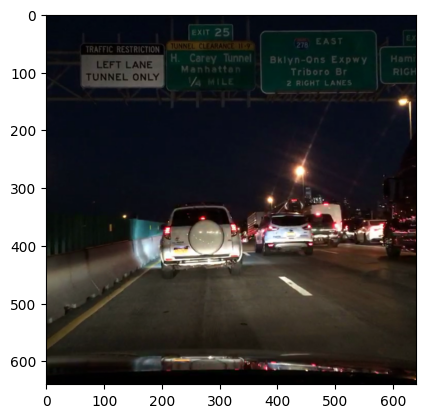

In [92]:
cap = cv2.VideoCapture(videoPath)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_index = random.randint(0, total_frames)
print(total_frames)
print(frame_index)
if not 0 <= frame_index <= total_frames:
    raise ValueError('Frame does not exist, since it is out of bound')

if not cap.isOpened():
    raise ValueError('Failed to open video file')

# sets the position for the frame to be grabbed.
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

# reads the frame
ret, frame = cap.read()

# resizing the frame
yLen, xLen, _ = frame.shape
Len = min(xLen, yLen)
frame = frame[int((yLen-Len)/2):int((yLen-Len)/2+Len), int((xLen-Len)/2):int((xLen-Len)/2+Len)]
frame = cv2.resize(frame, (640, 640))

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

if not ret:
    raise ValueError('Failed to retrieve frame')

plt.imshow(frame)
